<a href="https://colab.research.google.com/github/lfernandodiniz/alura_vox_challengedatascience/blob/master/Semana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semana 1 - Challenge Data Science Alura
Objetivos:

*   Entender quais informações o conjunto de dados possui.
*   Analisar quais são as inconsistências nos dados.
*   Corrigir as inconsistências nos dados.
*   Traduzir os dados.
*   Criar coluna de contas diárias.   

















In [1]:
# Importando as bibliotecas necessárias
import pandas as pd,numpy as np, seaborn as sns


In [3]:
# Visualizando os dados
df = pd.read_json('/content/Telco-Customer-Churn.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


O dataset possui diversas informações a respeito do cliente, conforme colunas:

customerID = Identificação única de cada cliente.
Churn = Indica se aquele cliente está ou não entre aqueles que cancelaram o serviço da empresa.
customer = Informações gerais do cliente, como gênero, se é ou não um cidadão idoso, se poussi dependentes, etc.
phone = Informações a respeito do serviço telefônico do cliente.
internet = Informações a respeito do serviço de internet do cliente.
account = Informações a respeito do tipo de contrato e pagamentos do cliente.

# **Vamos extrair os dados e normalizá-los**



In [4]:
cliente = pd.json_normalize(data = df.customer)
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [5]:
telefone = pd.json_normalize(data = df.phone)
telefone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
internet = pd.json_normalize(data = df.internet)
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
conta = pd.json_normalize(data=df.account)
conta.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
#Limpando os dados e concatenando
customerid = df.drop(columns=['customer','phone','internet', 'account'])
customerid.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [9]:
dados = pd.concat([customerid, cliente, telefone, internet, conta], axis = 1)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Analisando e Corrigindo Inconsistências

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Verificando os valores de Churn
dados.Churn.value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

## **Analisando os dados do DataFrame, três inconsistências são observadas:**

*   Charges.Total deveria ser do tipo float64, como Charges.Monthly.

*   Os dados presentes em SeniorCitizen devem ser transformados em 'Yes' ou 'No', ao invés de '1' e '0'.


*   A coluna Churn apresenta 224 dados em branco, que serão removidos.






In [13]:
# Convertendo Charges.Total para float e substituindo registros em branco com nan
dados['Charges.Total'] = dados['Charges.Total'].apply(lambda x: np.nan if x == ' ' else float(x))

In [60]:
# Verificando os dados da coluna Charges.Total

#dados['Charges.Total'].info(max_cols=1)
dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Churn                    7043 non-null   object 
 2   Gênero                   7043 non-null   object 
 3   Idoso                    7043 non-null   object 
 4   Parceiro                 7043 non-null   object 
 5   Dependentes              7043 non-null   object 
 6   Tempo_de_Contrato        7043 non-null   int64  
 7   Serviço_Telefônico       7043 non-null   object 
 8   Linhas_Múltiplas         7043 non-null   object 
 9   Serviço_Internet         7043 non-null   object 
 10  Segurança_Online         7043 non-null   object 
 11  Backup_Online            7043 non-null   object 
 12  Proteção_de_Dispositivo  7043 non-null   object 
 13  Suporte_Técnico          7043 non-null   object 
 14  Streaming_TV            

In [24]:
# Alterando os valores de SeniorCitizen para 'Sim' e 'Não'
yesorno = {0: 'Não', 1: 'Sim'}
dados.SeniorCitizen.replace(yesorno, inplace = True)
dados.SeniorCitizen.value_counts()

Não    6085
Sim    1182
Name: SeniorCitizen, dtype: int64

In [25]:
# Filtrando os registros sem labels em 'Churn'
limpa_churn = dados.Churn != ''
dados = dados[limpa_churn]
dados.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Traduzindo Colunas e Registros

In [26]:
#Tradução Colunas
dados.columns = ['ID_Cliente','Churn','Gênero', 'Idoso', 'Parceiro', 'Dependentes',
                'Tempo_de_Contrato','Serviço_Telefônico','Linhas_Múltiplas','Serviço_Internet',
                 'Segurança_Online','Backup_Online','Proteção_de_Dispositivo','Suporte_Técnico',
                 'Streaming_TV','Streaming_de_Filmes','Contrato','Cobrança_Digital',
                 'Método_de_Pagamento','Cobrança_Mensal','Cobrança_Total']

dados

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total
0,0002-ORFBO,No,Female,Não,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,Não,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,Não,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Sim,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Sim,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,Não,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,Não,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,Não,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,Não,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [27]:
# Tradução Dados
# 'Sim' e 'Não'
simnao = {'Yes': 'Sim', 'No': 'Não'}
colunas_simnao = ['Churn','Idoso','Parceiro','Dependentes','Serviço_Telefônico',
                 'Linhas_Múltiplas','Serviço_Internet','Backup_Online','Proteção_de_Dispositivo','Suporte_Técnico',
                 'Streaming_TV','Streaming_de_Filmes','Cobrança_Digital']

for i in colunas_simnao:
    dados[i].replace(simnao, inplace = True)

In [31]:
dados['Churn']





0       Não
1       Não
2       Sim
3       Sim
4       Sim
       ... 
7262    Não
7263    Sim
7264    Não
7265    Não
7266    Não
Name: Churn, Length: 7043, dtype: object

In [32]:
# Gênero
masc_fem = {'Male':'Masculino','Female':'Feminino'}
dados.Gênero.replace(masc_fem, inplace = True)

In [33]:
dados['Gênero']

0        Feminino
1       Masculino
2       Masculino
3       Masculino
4        Feminino
          ...    
7262     Feminino
7263    Masculino
7264    Masculino
7265    Masculino
7266    Masculino
Name: Gênero, Length: 7043, dtype: object

In [34]:
dados.Linhas_Múltiplas.value_counts()

Não                 3390
Sim                 2971
No phone service     682
Name: Linhas_Múltiplas, dtype: int64

In [36]:
sem_servico = {'No phone service': 'Sem serviço telefônico'}
dados.Linhas_Múltiplas.replace(sem_servico, inplace = True)

In [38]:
dados['Linhas_Múltiplas']

0                          Não
1                          Sim
2                          Não
3                          Não
4                          Não
                 ...          
7262                       Não
7263                       Sim
7264                       Não
7265                       Não
7266    Sem serviço telefônico
Name: Linhas_Múltiplas, Length: 7043, dtype: object

In [39]:
dados.Serviço_Internet.value_counts()

Fiber optic    3096
DSL            2421
Não            1526
Name: Serviço_Internet, dtype: int64

In [40]:
dados.Serviço_Internet.replace({'Fiber optic':'Fibra óptica'}, inplace = True)

In [42]:
dados['Serviço_Internet']

0                DSL
1                DSL
2       Fibra óptica
3       Fibra óptica
4       Fibra óptica
            ...     
7262             DSL
7263    Fibra óptica
7264             DSL
7265             DSL
7266             DSL
Name: Serviço_Internet, Length: 7043, dtype: object

In [43]:
dados.Contrato.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contrato, dtype: int64

In [44]:
dados.Contrato.replace({'Month-to-month': 'Mensal',
                       'Two year': 'Dois anos',
                       'One year': 'Anual'}, inplace = True)

In [45]:
dados['Contrato']

0           Anual
1          Mensal
2          Mensal
3          Mensal
4          Mensal
          ...    
7262        Anual
7263       Mensal
7264       Mensal
7265    Dois anos
7266    Dois anos
Name: Contrato, Length: 7043, dtype: object

In [46]:
dados.Método_de_Pagamento.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Método_de_Pagamento, dtype: int64

In [47]:
dados.Método_de_Pagamento.replace({'Electronic check':'Cheque eletrônico',
                                  'Mailed check': 'Cheque enviado',
                                  'Bank trasfer (automatic)':'Transferência bancária (automático)',
                                  'Credit card (automatic)':'Cartão de crédito (automático)'},
                                 inplace = True)

In [48]:
dados.Método_de_Pagamento.value_counts()

Cheque eletrônico                 2365
Cheque enviado                    1612
Bank transfer (automatic)         1544
Cartão de crédito (automático)    1522
Name: Método_de_Pagamento, dtype: int64

# **Criando coluna de contas diárias**

In [49]:
dados['Contas_Diárias'] = (dados['Cobrança_Mensal'] / 30).round(2)

In [50]:
dados['Contas_Diárias']

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7262    1.84
7263    2.84
7264    1.68
7265    2.26
7266    1.97
Name: Contas_Diárias, Length: 7043, dtype: float64

## Dataset final do Notebook
- Semana 1

In [51]:
dados

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.60,593.30,2.19
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.90,542.40,2.00
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Não,Cheque enviado,55.15,742.90,1.84
7263,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,85.10,1873.70,2.84
7264,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,50.30,92.75,1.68
7265,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Dois anos,Não,Cheque enviado,67.85,4627.65,2.26


# **Visualizando os dados da coluna Churns, representando a Taxa de Evasão**

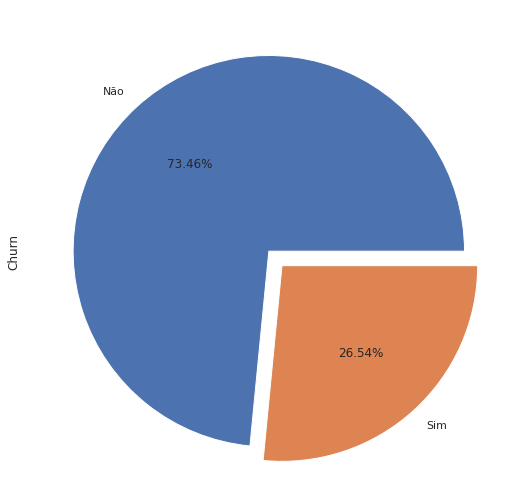

In [54]:
sns.set(rc={'figure.figsize':(12,9)})
dados.Churn.value_counts().plot(kind = 'pie', autopct='%.2f%%', explode = (0,0.1))

In [55]:
# Salvando o Dataset tratado como um arquivo .CSV
df.to_csv('Data_Tratado_Churn.csv', index=False)